# Lauras Capstone Project

Welcome to my Exploratory Data Analysis. Since I come from literary studies, I decided to choose a dataset with the topic of literature. I chose the CMU Book Summary Dataset (source: https://paperswithcode.com/dataset/cmu-book-summary-dataset). This dataset contains plot summaries for 16,559 books extracted from Wikipedia, along with aligned metadata from Freebase, including book author, title, and genre. Here is a link to the dataset's [README](README).

In [44]:
import json
from json.decoder import JSONDecodeError
import pandas as pd

In [1]:
file = open("booksummaries.txt", "r")
for line in file:
  print(line)
file.close()

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



The file is too big. Let's only read one line to check if I have read the data correctly.

In [2]:
file = open("booksummaries.txt", "r")
for line in file:
    print(line)
    break
file.close()

620	/m/0hhy	Animal Farm	George Orwell	1945-08-17	{"/m/016lj8": "Roman \u00e0 clef", "/m/06nbt": "Satire", "/m/0dwly": "Children's literature", "/m/014dfn": "Speculative fiction", "/m/02xlf": "Fiction"}	 Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a philosophy. The animals revolt and drive the drunken and irresponsible Mr Jones from the farm, renaming it "Animal Farm". They adopt Seven Commandments of Animal-ism, the most important of which is, "All animals are equal". Snowball attempts to teach the animals reading and writing; food is plentiful, and the farm runs smoothly. The pigs elevate themselves to positions of leadership and set aside special food items, ostensibly for their personal health. Napoleon takes the pups from the farm dogs an

I create a dictionary, because dictonaries meet the requirement for the pandas.DataFrame constructor.

In [19]:
data = {
    "wikipedia_article_id": [],
    "freebase_id": [],
    "book_title": [],
    "author": [],
    "publication_date": [],
    "book_genres": [],
    "plot_summary": [],
}

I use break to validate my transformation on the first row only.

In [5]:
file = open("booksummaries.txt", "r")
for line in file:
    line_parts = line.split("\t")
    print(line_parts)
    break
file.close()

['620', '/m/0hhy', 'Animal Farm', 'George Orwell', '1945-08-17', '{"/m/016lj8": "Roman \\u00e0 clef", "/m/06nbt": "Satire", "/m/0dwly": "Children\'s literature", "/m/014dfn": "Speculative fiction", "/m/02xlf": "Fiction"}', ' Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, \'Beasts of England\'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a philosophy. The animals revolt and drive the drunken and irresponsible Mr Jones from the farm, renaming it "Animal Farm". They adopt Seven Commandments of Animal-ism, the most important of which is, "All animals are equal". Snowball attempts to teach the animals reading and writing; food is plentiful, and the farm runs smoothly. The pigs elevate themselves to positions of leadership and set aside special food items, ostensibly for their personal health. Napoleon takes the pu

There is another dictionary on index 5 (i.e. genres). I need to convert it.

In [7]:
file = open("booksummaries.txt", "r")
for line in file:
    line_parts = line.split("\t")
    genres = json.loads(line_parts[5])
    print(genres)
    break
file.close()

{'/m/016lj8': 'Roman à clef', '/m/06nbt': 'Satire', '/m/0dwly': "Children's literature", '/m/014dfn': 'Speculative fiction', '/m/02xlf': 'Fiction'}


I want to separate these values in the dictionary. Since it is possible and readable, I use function chaining.

In [8]:
file = open("booksummaries.txt", "r")
for line in file:
    line_parts = line.split("\t")
    genres = json.loads(line_parts[5]).values()
    print(genres)
    break
file.close()

dict_values(['Roman à clef', 'Satire', "Children's literature", 'Speculative fiction', 'Fiction'])


Since dict.values() returns a view of the dictionary, not a list, I need to wrap the whole expression in list().

In [9]:
file = open("booksummaries.txt", "r")
for line in file:
    line_parts = line.split("\t")
    genres = list(json.loads(line_parts[5]).values())
    print(genres)
    break
file.close()

['Roman à clef', 'Satire', "Children's literature", 'Speculative fiction', 'Fiction']


I want to create a comma-separated string. Because I don't know all genre names yet, I use semicolon as delimiter (just in case one genre regularly contains a comma).

In [10]:
file = open("booksummaries.txt", "r")
for line in file:
    line_parts = line.split("\t")
    genres = list(json.loads(line_parts[5]).values())
    genres_string = ";".join(genres)
    print(genres_string)
    break
file.close()

Roman à clef;Satire;Children's literature;Speculative fiction;Fiction


Due to parsing the lines from the source file, the last character of each line is a \n indicating a new line. Let's get rid of it!

In [14]:
file = open("booksummaries.txt", "r")
for line in file:
    line_parts = line.split("\t")
    genres = list(json.loads(line_parts[5]).values())
    genres_string = ";".join(genres)
    sanitized_plot = line_parts[6].strip()
    print(sanitized_plot)
    break
file.close()

Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a philosophy. The animals revolt and drive the drunken and irresponsible Mr Jones from the farm, renaming it "Animal Farm". They adopt Seven Commandments of Animal-ism, the most important of which is, "All animals are equal". Snowball attempts to teach the animals reading and writing; food is plentiful, and the farm runs smoothly. The pigs elevate themselves to positions of leadership and set aside special food items, ostensibly for their personal health. Napoleon takes the pups from the farm dogs and trains them privately. Napoleon and Snowball struggle for leadership. When Snowball announces his plans to build a windmill, Napoleon has his dogs chase Snowball away and declares himself leader. Napol

Now let's populate the dictionary with the first line, i.e. book summary.

In [21]:
file = open("booksummaries.txt", "r")
for line in file:
    line_parts = line.split("\t")
    genres = list(json.loads(line_parts[5]).values())
    genres_string = ";".join(genres)
    sanitized_plot = line_parts[6].strip()
    
    data["wikipedia_article_id"].append(line_parts[0])
    data["freebase_id"].append(line_parts[1])
    data["book_title"].append(line_parts[2])
    data["author"].append(line_parts[3])
    data["publication_date"].append(line_parts[4])
    data["book_genres"].append(genres_string)
    data["plot_summary"].append(sanitized_plot)
    break
file.close()

In [22]:
print(data)

{'wikipedia_article_id': ['620'], 'freebase_id': ['/m/0hhy'], 'book_title': ['Animal Farm'], 'author': ['George Orwell'], 'publication_date': ['1945-08-17'], 'book_genres': ["Roman à clef;Satire;Children's literature;Speculative fiction;Fiction"], 'plot_summary': ['Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, \'Beasts of England\'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a philosophy. The animals revolt and drive the drunken and irresponsible Mr Jones from the farm, renaming it "Animal Farm". They adopt Seven Commandments of Animal-ism, the most important of which is, "All animals are equal". Snowball attempts to teach the animals reading and writing; food is plentiful, and the farm runs smoothly. The pigs elevate themselves to positions of leadership and set aside special food items, ostensibly for the

Seems to work! Now let's remove the break statement to populate the dictionary with the complete source data, i.e. 16,559 books.
But first I have to execute the dictionary again to empty it. 

In [3]:
data = {
    "wikipedia_article_id": [],
    "freebase_id": [],
    "book_title": [],
    "author": [],
    "publication_date": [],
    "book_genres": [],
    "plot_summary": [],
}
print(data)

{'wikipedia_article_id': [], 'freebase_id': [], 'book_title': [], 'author': [], 'publication_date': [], 'book_genres': [], 'plot_summary': []}


In [4]:
file = open("booksummaries.txt", "r")

for line in file:
    line_parts = line.split("\t")
    # I need to check for JSONDecodeErrors since I got this error. I checked the data set manually and now I know that the error was thrown because some books don't have a genre.
    try:
        genres = list(json.loads(line_parts[5]).values())
        genres_string = ";".join(genres)
    except JSONDecodeError as error:
        genres_string = ""
   
    sanitized_plot = line_parts[6].strip()
    
    data["wikipedia_article_id"].append(line_parts[0])
    data["freebase_id"].append(line_parts[1])
    data["book_title"].append(line_parts[2])
    data["author"].append(line_parts[3])
    data["publication_date"].append(line_parts[4])
    data["book_genres"].append(genres_string)
    data["plot_summary"].append(sanitized_plot)
    
file.close()

In [39]:
print(data)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



It seems that my dataset is too big for Jupyter to handle the printing. (: I just count how many items have been added.

In [5]:
print(len(data["wikipedia_article_id"]))
print(len(data["freebase_id"]))
print(len(data["book_title"]))
print(len(data["author"]))
print(len(data["publication_date"]))
print(len(data["book_genres"]))
print(len(data["plot_summary"]))

16559
16559
16559
16559
16559
16559
16559


Every entry in the dictionary has the same and right amount of items. The data transformation is thereby completed. Now let's open the dataset in a Pandas Dataframe.

In [7]:
data_frame = pd.DataFrame(data=data)
print(data_frame)

      wikipedia_article_id freebase_id  \
0                      620     /m/0hhy   
1                      843     /m/0k36   
2                      986     /m/0ldx   
3                     1756     /m/0sww   
4                     2080     /m/0wkt   
...                    ...         ...   
16554             36934824  /m/0m0p0hr   
16555             37054020  /m/04f1nbs   
16556             37122323  /m/0n5236t   
16557             37132319  /m/0n4bqb1   
16558             37159503   /m/073nkd   

                                              book_title              author  \
0                                            Animal Farm       George Orwell   
1                                     A Clockwork Orange     Anthony Burgess   
2                                             The Plague        Albert Camus   
3              An Enquiry Concerning Human Understanding          David Hume   
4                                   A Fire Upon the Deep        Vernor Vinge   
...            

Now let's start with the exploration of the data and describe it. I developed five research questions for my dataset. The first one is about the publication dates:
> 1. How are the publication dates distributed? Is there a decennial that was most productive and least productive?

In [8]:
data_frame.plot()

TypeError: no numeric data to plot

I need to add some numeric data, therefore I add an additional column that only contains the publication year.

In [53]:
data = {
    "wikipedia_article_id": [],
    "freebase_id": [],
    "book_title": [],
    "author": [],
    "publication_date": [],
    "publication_year": [],
    "book_genres": [],
    "plot_summary": [],
}
print(data)

{'wikipedia_article_id': [], 'freebase_id': [], 'book_title': [], 'author': [], 'publication_date': [], 'publication_year': [], 'book_genres': [], 'plot_summary': []}


According to the example data I can encounter three date formats.

In [16]:
test1 = "1999-01-01"
test2 = "1999"
test3 = ""
result1 = int(test1.split("-")[0])
result2 = int(test2.split("-")[0])
# result3 = int(test3.split("-")[0])
print(result1,result2)

1999 1999


In [54]:
file = open("booksummaries.txt", "r")

for line in file:
    line_parts = line.split("\t")
    # I need to check for JSONDecodeErrors since I got this error. I checked the data set manually and now I know that the error was thrown because some books don't have a genre.
    try:
        genres = list(json.loads(line_parts[5]).values())
        genres_string = ";".join(genres)
    except JSONDecodeError as error:
        genres_string = ""
   
    sanitized_plot = line_parts[6].strip()
    
    year = line_parts[4].split("-")[0]
    if len(year) >= 1:
        publication_year = int(year)
    else:
        publication_year = 0
    
    data["wikipedia_article_id"].append(line_parts[0])
    data["freebase_id"].append(line_parts[1])
    data["book_title"].append(line_parts[2])
    data["author"].append(line_parts[3])
    data["publication_date"].append(line_parts[4])    
    data["publication_year"].append(publication_year)
    data["book_genres"].append(genres_string)
    data["plot_summary"].append(sanitized_plot)
    
file.close()

In [55]:
data_frame = pd.DataFrame(data=data)
print(data_frame)

      wikipedia_article_id freebase_id  \
0                      620     /m/0hhy   
1                      843     /m/0k36   
2                      986     /m/0ldx   
3                     1756     /m/0sww   
4                     2080     /m/0wkt   
...                    ...         ...   
16554             36934824  /m/0m0p0hr   
16555             37054020  /m/04f1nbs   
16556             37122323  /m/0n5236t   
16557             37132319  /m/0n4bqb1   
16558             37159503   /m/073nkd   

                                              book_title              author  \
0                                            Animal Farm       George Orwell   
1                                     A Clockwork Orange     Anthony Burgess   
2                                             The Plague        Albert Camus   
3              An Enquiry Concerning Human Understanding          David Hume   
4                                   A Fire Upon the Deep        Vernor Vinge   
...            

In [35]:
data_frame.head(10)

,wikipedia_article_id,freebase_id,book_title,author,publication_date,publication_year,book_genres,plot_summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,1945,Roman à clef;Satire;Children's literature;Spec...,"Old Major, the old boar on the Manor Farm, cal..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,1962,Science Fiction;Novella;Speculative fiction;Ut...,"Alex, a teenager living in near-future England..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,1947,Existentialism;Fiction;Absurdist fiction;Novel,The text of The Plague is divided into five pa...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,,0,,The argument of the Enquiry proceeds by a seri...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,,0,Hard science fiction;Science Fiction;Speculati...,The novel posits that space around the Milky W...
5,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,1929,War novel;Roman à clef,"The book tells the story of Paul Bäumer, a Ger..."
6,2890,/m/011zx,A Wizard of Earthsea,Ursula K. Le Guin,1968,1968,Children's literature;Fantasy;Speculative fict...,"Ged is a young boy on Gont, one of the larger ..."
7,2950,/m/012dq,Anyone Can Whistle,Arthur Laurents,,0,,The story is set in an imaginary American town...
8,4081,/m/01b4w,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,1996,Science Fiction;Speculative fiction,"Living on Mars, Deckard is acting as a consult..."
9,4082,/m/01b56,Blade Runner 2: The Edge of Human,K. W. Jeter,1995-10-01,1995,Science Fiction;Speculative fiction,Beginning several months after the events in B...


In [36]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16559 entries, 0 to 16558
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   wikipedia_article_id  16559 non-null  object
 1   freebase_id           16559 non-null  object
 2   book_title            16559 non-null  object
 3   author                16559 non-null  object
 4   publication_date      16559 non-null  object
 5   publication_year      16559 non-null  int64 
 6   book_genres           16559 non-null  object
 7   plot_summary          16559 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.0+ MB


In [32]:
file = open("booksummaries.txt", "r")

pub_year_mapping = {
    "publication_year": [],
    "publications_count": [],
}

for line in file:
    line_parts = line.split("\t")
    
    year = line_parts[4].split("-")[0]
    if len(year) >= 1:
        publication_year = int(year)
    else:
        publication_year = 0

    # Populate pub_year_mapping
    if publication_year == 0:
        continue
        
    if publication_year < 1950 or publication_year >= 2011:
        continue
    
    try:
        index = pub_year_mapping["publication_year"].index(publication_year)
        pub_year_mapping["publications_count"][index] += 1
    except ValueError as ex:
        pub_year_mapping["publication_year"].append(publication_year)
        pub_year_mapping["publications_count"].append(1)
    
    
file.close()

year_mapping_data_frame = pd.DataFrame(data=pub_year_mapping)
sorted_year_mapping_data_frame = year_mapping_data_frame.sort_values(by=['publication_year'])
print(sorted_year_mapping_data_frame)

    publication_year  publications_count
43              1950                  43
25              1951                  45
27              1952                  54
8               1953                  56
21              1954                  54
..               ...                 ...
58              2006                 455
20              2007                 466
57              2008                 387
60              2009                 287
59              2010                 200

[61 rows x 2 columns]


<Axes: xlabel='Publication year', ylabel='Number of publications'>

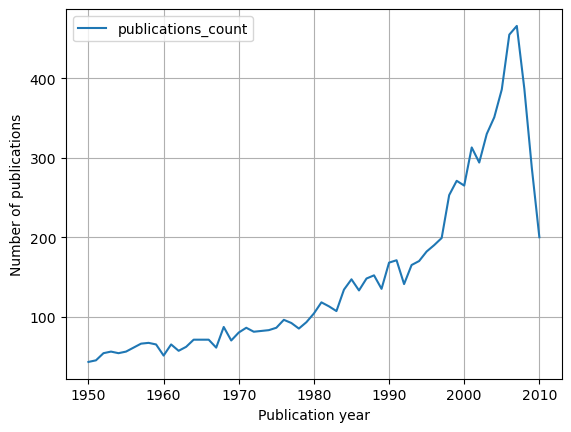

In [33]:
sorted_year_mapping_data_frame.plot(x="publication_year", y="publications_count", grid=True, xlabel="Publication year", ylabel="Number of publications")

<Axes: xlabel='Publication year', ylabel='Number of publications'>

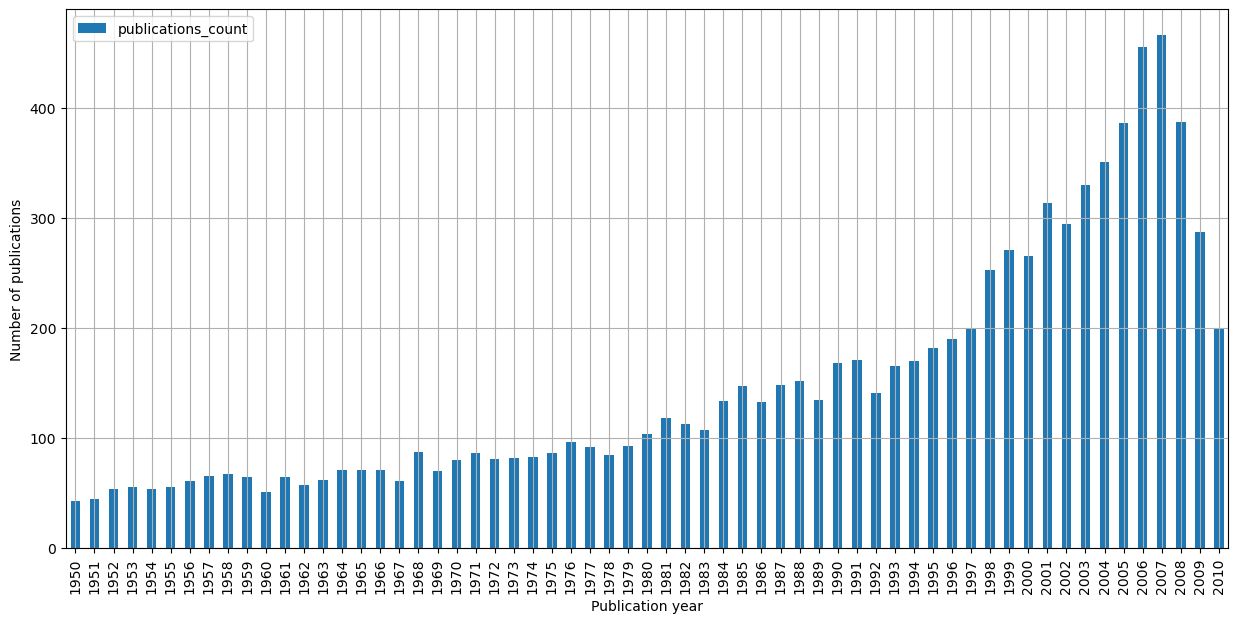

In [36]:
sorted_year_mapping_data_frame.plot(x="publication_year", y="publications_count", grid=True, xlabel="Publication year", ylabel="Number of publications", kind="bar", figsize=(15,7))

Great, I visualized my data. My research question was, if there was a most productive decennial. It seems that the years between 2000 and 2010 were most productive. But I think that the reason for that is also that during these years people just wrote most plot summaries of recently published books for Wikipedia. One always needs to keep in mind how representative a dataset for a specific research question actually is.

Now let's continue with my second research question:
> 2. I want to discover the length of book titles, i.e. how many words they include. My hypothesis is, that book titles are getting increasingly longer the more recent they have been published. I want to check if this is just happening for book titles in German, or even for English book titles as well.

In [45]:
import pandas as pd

file = open("booksummaries.txt", "r")

length_book_titles = {
    "publication_years": [],
    "book_titles": [],
    "word_count_book_titles": [],
}

for line in file:
    line_parts = line.split("\t")
    
    year = line_parts[4].split("-")[0]
    if len(year) >= 1:
        publication_year = int(year)
    else:
        continue
    
    if publication_year < 1900 or publication_year >= 2010:
        continue
    
    word_count_book_titles = line_parts[2].split(" ")    
    
    length_book_titles["publication_years"].append(publication_year)
    length_book_titles["book_titles"].append(line_parts[2])
    length_book_titles["word_count_book_titles"].append(len(word_count_book_titles))

file.close()

word_count_book_titles_data_frame = pd.DataFrame(data=length_book_titles)
sorted_word_count_book_titles_data_frame = word_count_book_titles_data_frame.sort_values(by=["publication_years"])
word_count_book_titles_data_frame.head(10)

,publication_years,book_titles,word_count_book_titles
0,1945,Animal Farm,2
1,1962,A Clockwork Orange,3
2,1947,The Plague,2
3,1929,All Quiet on the Western Front,6
4,1968,A Wizard of Earthsea,4
5,1996,Blade Runner 3: Replicant Night,5
6,1995,Blade Runner 2: The Edge of Human,7
7,1973,Crash,1
8,1976,Children of Dune,3
9,1985,Chapterhouse Dune,2


<Axes: xlabel='Publication year', ylabel='Number of words'>

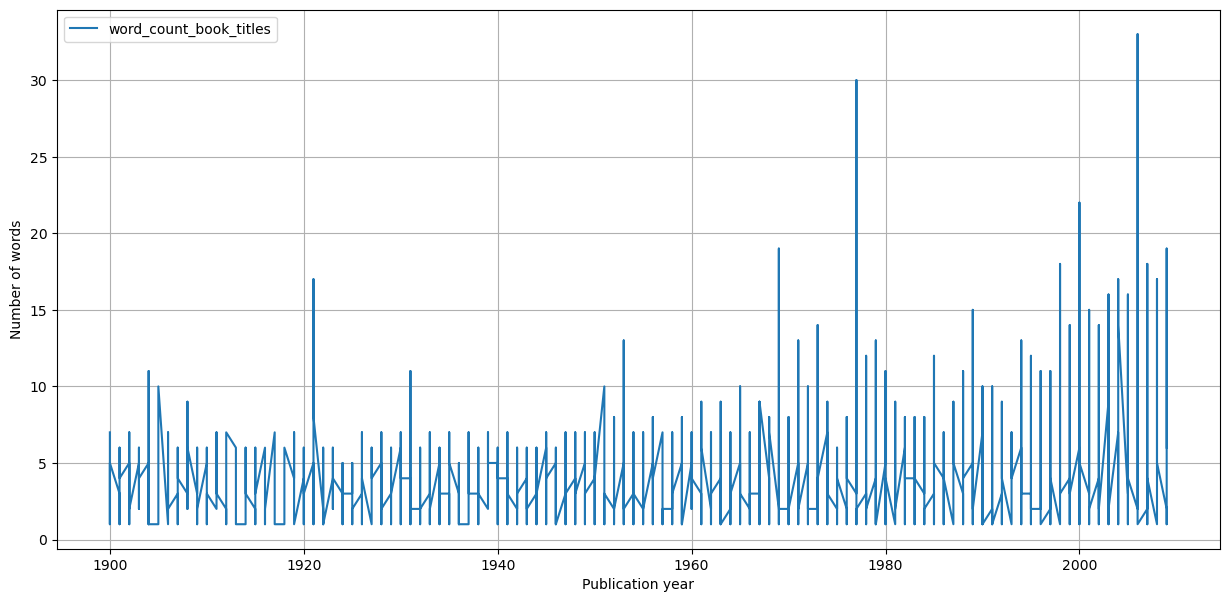

In [37]:
sorted_word_count_book_titles_data_frame.plot(x="publication_years", y="word_count_book_titles", grid=True, xlabel="Publication year", ylabel="Number of words", figsize=(15,7))

<Axes: xlabel='Publication year', ylabel='Number of words'>

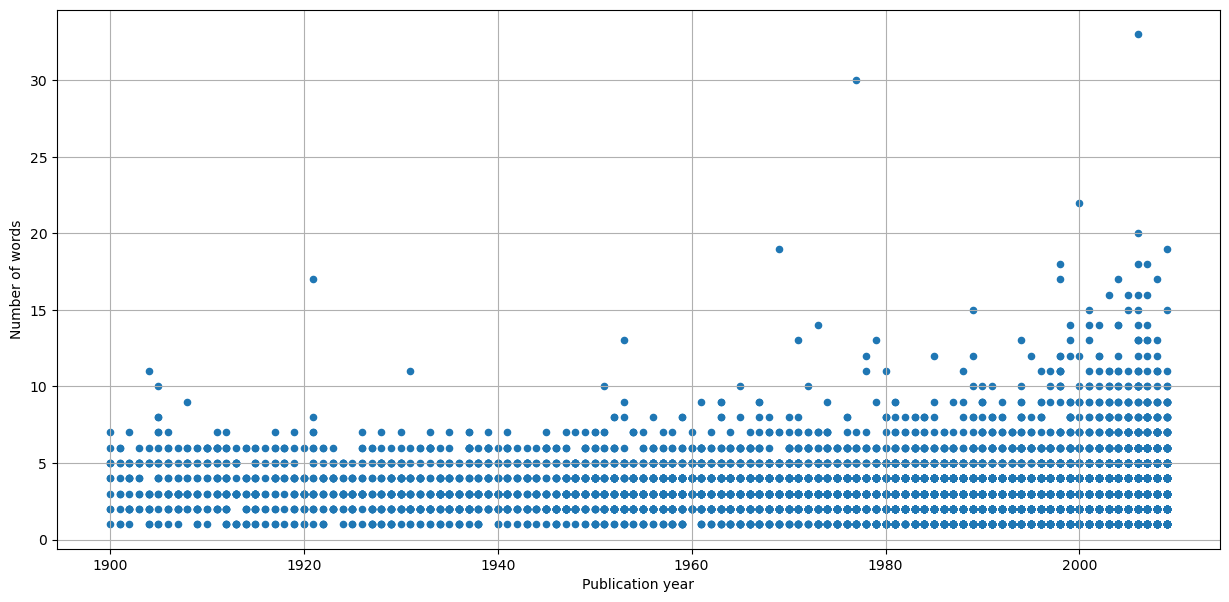

In [47]:
sorted_word_count_book_titles_data_frame.plot(x="publication_years", y="word_count_book_titles", grid=True, xlabel="Publication year", ylabel="Number of words", kind="scatter", figsize=(15,7))

Let's continue with my third research question:
> 3. Who are the 20 authors with the most publications?

In [88]:
import pandas as pd

file = open("booksummaries.txt", "r")

authors = {}

for line in file:
    line_parts = line.split("\t")
    author = line_parts[3]
    #some entries do not have an author name, I want to skip these
    if author == "":
        continue
    if author in authors:
        authors[author] += 1
    else:
        authors[author] = 1
    
file.close()

authors_book_count = {
    "authors": [],
    "book_count": [],
}

for (author, book_count) in authors.items():
    authors_book_count["authors"].append(author)
    authors_book_count["book_count"].append(book_count)
    
authors_book_count_data_frame = pd.DataFrame(data=authors_book_count)
sorted_book_count_data_frame = authors_book_count_data_frame.sort_values(by=["book_count"],ascending=False)
top_20_authors = sorted_book_count_data_frame.head(20)
top_20_authors

,authors,book_count
246,Agatha Christie,74
1276,Franklin W. Dixon,68
881,K. A. Applegate,62
53,Stephen King,60
879,Edgar Rice Burroughs,59
324,Ruth Rendell,55
552,John Dickson Carr,55
347,P. G. Wodehouse,50
429,Harry Turtledove,49
46,Orson Scott Card,49


<Axes: >

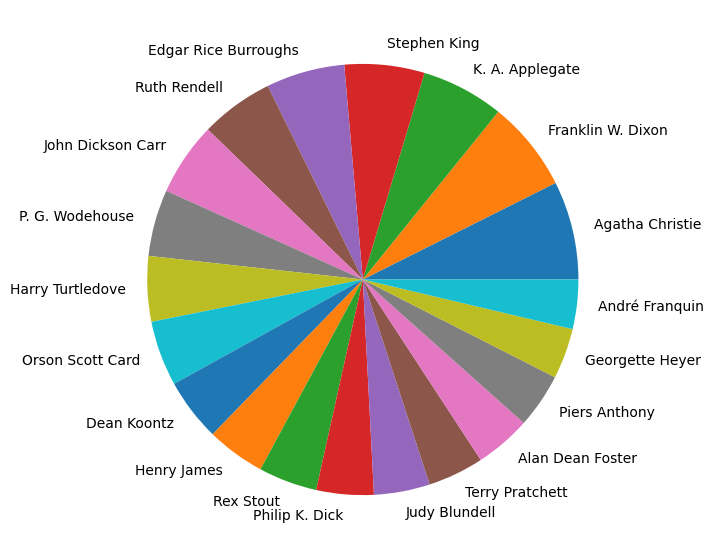

In [96]:
authors_book_count_data_frame_with_labels = pd.DataFrame(data=authors_book_count, index=authors_book_count["authors"])
sorted_book_count_data_frame_with_labels = authors_book_count_data_frame_with_labels.sort_values(by=["book_count"],ascending=False)
top_20_authors_with_labels = sorted_book_count_data_frame_with_labels.head(20)

top_20_authors_with_labels.plot(y="book_count", ylabel="", kind="pie", figsize=(30,7), legend=False)

<Axes: ylabel='Published books'>

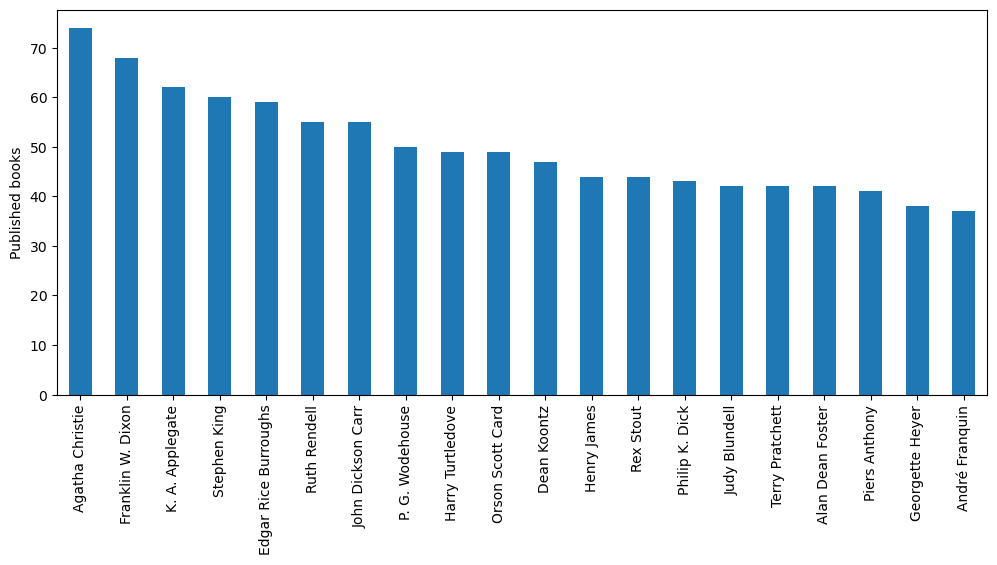

In [105]:
top_20_authors_with_labels.plot(y="book_count", ylabel="Published books", kind="bar", figsize=(12,5), legend=False)

I want to introduce my two remaining research questions:
> 4. How are the genres distributed? My hypothesis is, that novels or fiction are most frequent.
> 5. Search the plot summaries for most frequent topics. Example topics are "murder", "love", "vampire" (since there was a trend for vampire novels a few years ago), and "travel" (with the synonyms "journey" and "voyage").

Unfortunately, I can't explore and describe these two research questions, because transforming my dataset to a format that fits Pandas DataFrame really took me a lot of time. However, maybe I will explore these remaining questions within the next assignment. Furthermore, I'm looking forward to working with similar datasets in my future literary research.